# Log-Normal Distribution

Dustin D. Gerrard
<br>
September 2018

This notebook describes the log-normal (or Galton) distribution and provides relevant python commands. The log-normal distribution is applicable whenever the log of a random variable has a normal distribution. It is also applicable to natural growth processes subject to small percentage changes.
<br>
<br>
https://en.wikipedia.org/wiki/Log-normal_distribution
<br>
<br>
Examples:
* Length of chess game (https://chess.stackexchange.com/questions/2506/what-is-the-average-length-of-a-game-of-chess/4899#4899)
* Length of time users view an online article.
* Income.
* Life-span of device whose failure mode is fatigue stress.
* Time to repair a maintainable system (reliability).

<h2><center><u>Log-Normal Distribution Notation</u></center></h2>
\begin{equation*}
\Large
Lognormal(\mu,\sigma^2) 
\end{equation*}

\begin{equation*}
\Large
Y = ln(X)
\end{equation*} 

<h3><center>where $Y$ is normal</center></h3>

<h2><center><u>Log-Normal p.d.f.</u></center></h2>
\begin{equation*}
\Large
f(X; \mu, \sigma^2) = \frac{1}{x\sigma\sqrt{2\pi}}e^\frac{-(ln(X)-\mu)^2}{2\sigma^2}
\end{equation*}



In [1]:
from IPython.core.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/a/ae/PDF-log_normal_distributions.svg') 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.special import erf, erfinv

# Log-Normal Distribution using scipy

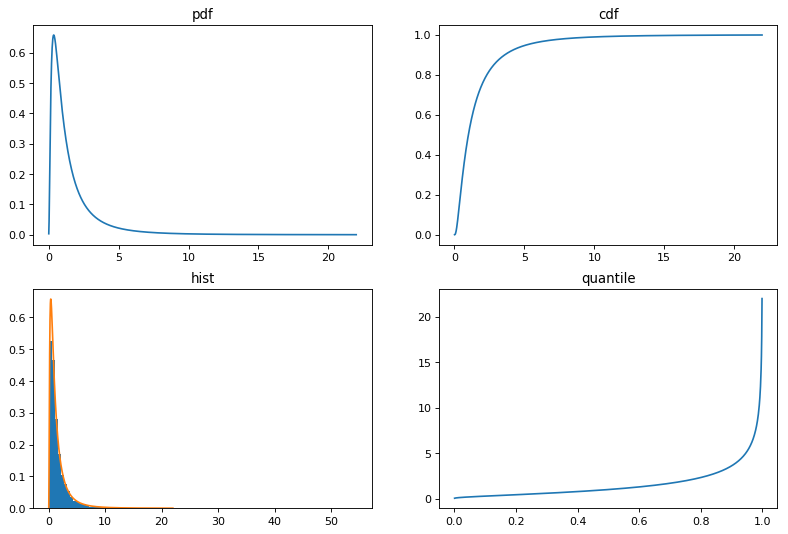

In [3]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html
mu = 0
sigma = 1
x = np.linspace(lognorm.ppf(0.00001, sigma, loc=mu, scale=1), lognorm.ppf(0.999, sigma, loc=mu, scale=1), 1000) # ppf = percent point function
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.plot(x, lognorm.pdf(x, sigma, loc=mu, scale=1)) # pdf = probability distribution function
plt.title('pdf')
plt.subplot(222)
plt.plot(x, lognorm.cdf(x, sigma, loc=mu, scale=1)) # cdf = cumumlative distribution function
plt.title('cdf')
plt.subplot(223)
r = lognorm.rvs(sigma, loc=mu, scale=1, size=10000) # rvs = random variates
plt.hist(r, 100, density=True)
plt.plot(x, lognorm.pdf(x, sigma, loc=mu, scale=1))
plt.title('hist')
r = lognorm.rvs(sigma, loc=mu, scale=sigma, size=100000)
plt.subplot(224)
q = np.linspace(0.001, 0.999, 1000)
plt.plot(q, lognorm.ppf(q, sigma, loc=mu, scale=1))
plt.title('quantile')
plt.show()

# Log-Normal Distribution explicityly in python.

In [4]:
def lognormalDist(mu, sigma):
    Xs = np.linspace(np.exp(mu-3*sigma), np.exp(mu+3*sigma),10001)
    Ys = 1/(Xs*np.sqrt(2*np.pi*pow(sigma,2)))*np.exp(-pow((np.log(Xs)-mu),2)/(2*pow(sigma,2)))
    CDFs = 1/2*(1+erf((np.log(Xs) - mu)/(sigma*np.sqrt(2))))
    return Xs, Ys, CDFs

# pdf - probability distribution function

In [5]:
mu, sigma = 0, 1
Xs, Ys, CDFs = lognormalDist(mu, sigma)

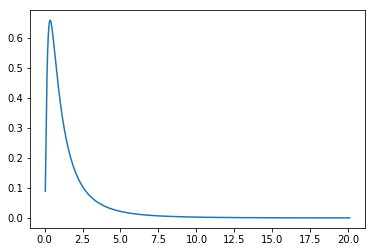

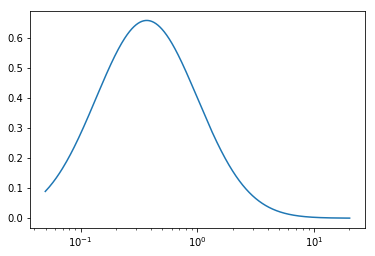

In [6]:
plt.plot(Xs,Ys)
plt.show()
plt.semilogx(Xs,Ys)
plt.show()

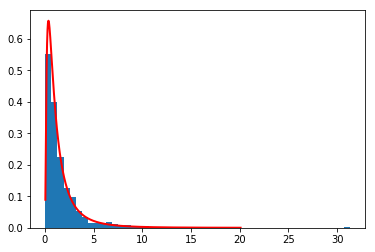

In [7]:
A = np.random.lognormal(mu, sigma,1000)
plt.hist(A,50, density=True)
plt.plot(Xs, Ys, linewidth=2, color='r')
plt.show()

# cdf - cumulative distribution function

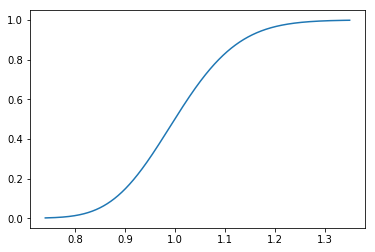

In [8]:
mu, sigma = 0, 0.1
Xs, Ys, CDFs = lognormalDist(mu, sigma)

plt.plot(Xs,CDFs)
plt.show()

In [9]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/4/42/CDF-log_normal_distributions.svg')

# Quantile

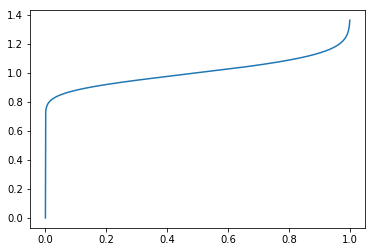

In [10]:
mu, sigma = 0, 0.1
Fs = np.linspace(0,1,1001)
Qs = np.exp(mu + sigma*np.sqrt(2)*erfinv(2*(Fs) - 1))
plt.plot(Fs,Qs)
plt.show()

In [11]:
np.exp(Fs)

array([1.        , 1.0010005 , 1.002002  , ..., 2.7128507 , 2.71556491,
       2.71828183])